In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# PSEUDOCODE
* **1** - Pick K random points as cluster centers called centroids.
* **2** - Assign each data point to nearest cluster by calculating its distance to each centroid.
* **3** - Find new cluster center by taking the average of the assigned points.
* **4** - Repeat Step 2 and 3 until none of the cluster assignments change.

# READ DATA
### The dataset comes from the R-package `cluster`. And it is an artificial data set consisting of 3000 points in 3 quite well-separated clusters.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/frandiego/data/master/xclara.csv',sep=';',decimal=b',')

# VISUSLIZE DATA

In [3]:
from plotnine import *

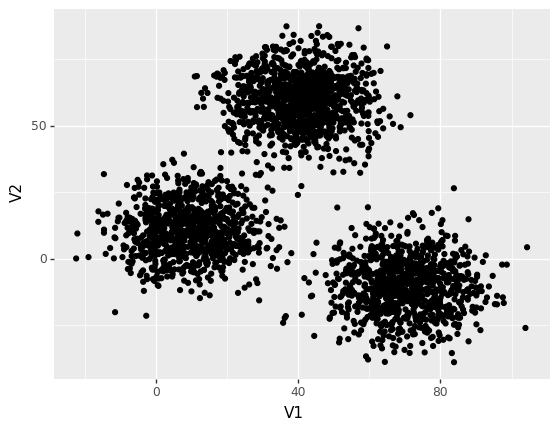

<ggplot: (8759983289043)>

In [4]:
ggplot(df, aes(x='V1', y = 'V2')) + geom_point()

# PANDAS TO MATRIX

In [5]:
X = np.array(list(zip(df.V1.values, df.V2.values)))

# CREATING A DISTANCE FUNCTION, LET'S SAY EUCLIDIAN DISTANCE

In [6]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# CREATING 3 RANDOM CENTROIDS

In [7]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[42.  5.]
 [33. 46.]
 [72. 65.]]


# PLOT CENTROIDS

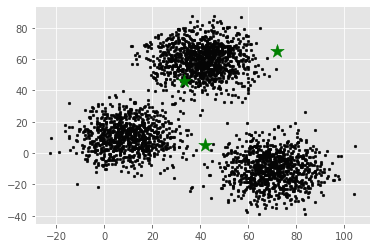

In [8]:
plt.scatter(df.V1, df.V2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# ITERATE TILL CONVERGENCE

98.85051776638454
14.360952377319336
5.7685041427612305
11.839943885803223
6.373178482055664
16.120115280151367
0.45623278617858887
0.008363127708435059


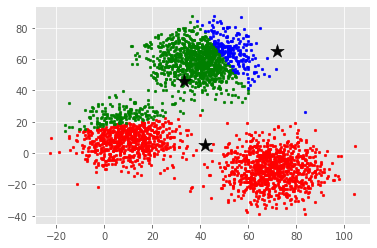

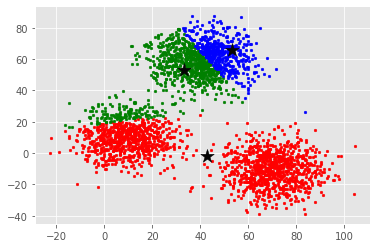

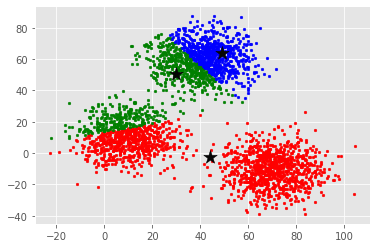

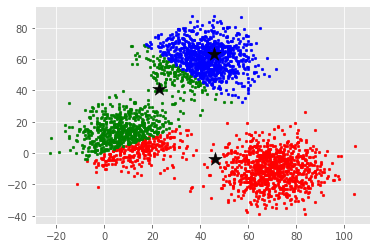

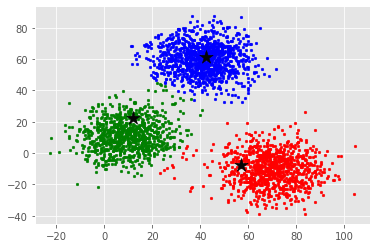

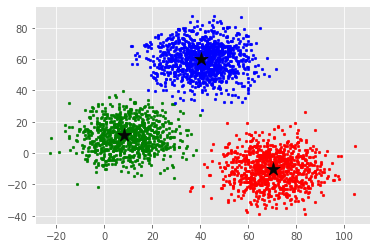

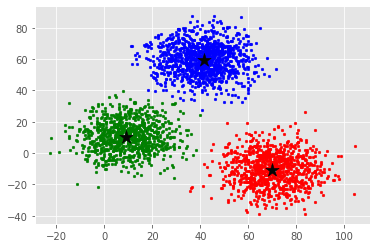

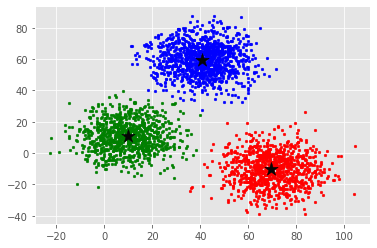

In [9]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
error_diff = 1
# Loop will run till the error becomes zero
while error_diff >= 0.05:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
        # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean([points[i] for i in np.random.choice(range(0,len(points)),int(len(points)*0.5))],axis=0)
    error_old = deepcopy(error)
    error = dist(C, C_old, None)
    error_diff = float(np.abs(error-error_old))
    print(error_diff)

# VISUALIZE OUTPUT

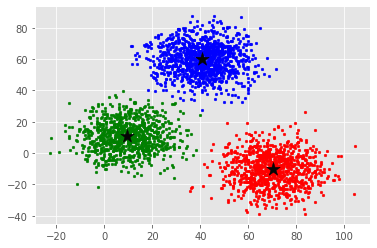

In [10]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# SKLEARN APPROACH

In [11]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.transform(X)
# Centroid values
centroids = kmeans.cluster_centers_

# VISUALIZE SKLEARN OUTPUT

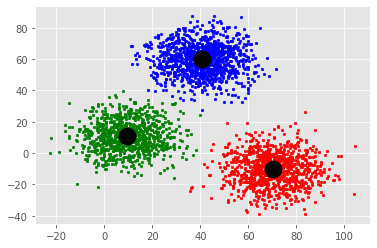

In [12]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='o', s=300, c='#050505')   

# HANDMADE CENTROIDS (C) vs SKLEARN CENTROIDS (centroids)

In [13]:
C

array([[70.432014, -9.948221],
       [ 9.249694, 10.85647 ],
       [40.486053, 59.848324]], dtype=float32)

In [14]:
centroids

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])